In [1]:
!pip install scikit-surprise

In [2]:
from surprise import SVD
from surprise import Dataset
from surprise.model_selection import cross_validate
import matplotlib.pyplot as plt
from surprise import SVDpp, NMF
from surprise import Reader
from surprise import KNNBasic, KNNWithZScore

In [3]:
data = Dataset.load_builtin('ml-100k')

In [4]:
svd = SVD()
svdpp = SVDpp()
nmf = NMF()
knn_b = KNNBasic()
knn_w = KNNWithZScore()

In [5]:
_svd = cross_validate(svd, data, measures=['RMSE'], cv=3, verbose=True)
_svdpp = cross_validate(svdpp, data, measures=['RMSE'], cv=3, verbose=True)
_nmf = cross_validate(nmf, data, measures=['RMSE'], cv=3, verbose=True)
_knn_b = cross_validate(knn_b, data, measures=['RMSE'], cv=3, verbose=True)
_knn_w  = cross_validate(knn_w, data, measures=['RMSE'], cv=3, verbose=True)

Evaluating RMSE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9433  0.9508  0.9471  0.9471  0.0030  
Fit time          1.90    2.02    1.75    1.89    0.11    
Test time         0.67    0.56    0.70    0.64    0.06    
Evaluating RMSE of algorithm SVDpp on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9266  0.9212  0.9309  0.9263  0.0040  
Fit time          30.54   30.92   26.39   29.28   2.05    
Test time         13.27   10.32   10.97   11.52   1.27    
Evaluating RMSE of algorithm NMF on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9818  0.9684  0.9782  0.9761  0.0057  
Fit time          2.15    2.40    3.08    2.55    0.39    
Test time         0.47    0.59    0.59    0.55    0.06    
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matri

In [6]:
meanSVD = _svd['test_rmse'].mean()
print("SVD RMSE:", meanSVD)
meanSVDpp = _svdpp['test_rmse'].mean()
print("SVDpp RMSE:", meanSVDpp)
meanNMF = _nmf['test_rmse'].mean()
print("NMF RMSE:", meanNMF)
meanKNNBasic = _knn_b['test_rmse'].mean()
print("KNNBasic RMSE:", meanKNNBasic)
meanKNNWithZScore = _knn_w['test_rmse'].mean()
print("KNNWithZScore RMSE:", meanKNNWithZScore)

SVD RMSE: 0.9470852834808791
SVDpp RMSE: 0.9262522828138572
NMF RMSE: 0.9761480239483733
KNNBasic RMSE: 0.9884827569451126
KNNWithZScore RMSE: 0.9580240044347242


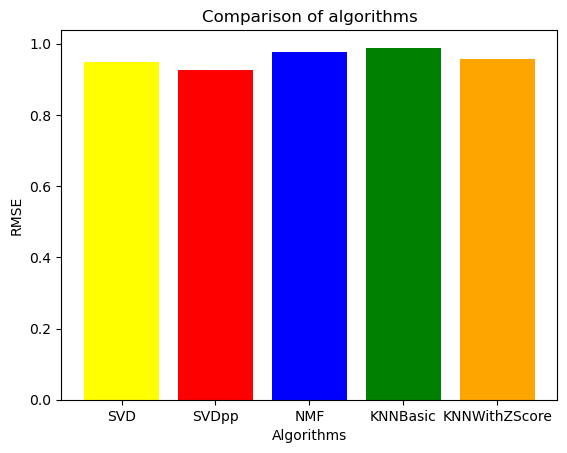

In [7]:
algorithms = [meanSVD, meanSVDpp, meanNMF, meanKNNBasic, meanKNNWithZScore]
algorithm_names = ["SVD", "SVDpp", "NMF", "KNNBasic", "KNNWithZScore"]
plt.bar(algorithm_names, algorithms, color = ['yellow', 'red', 'blue', 'green', 'orange'])
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('Comparison of algorithms')
plt.show()

Після аналізу та порівняння результатів, ми можемо зробити висновок про кращий алгоритм рекомендації для нашого датасету movielens-100k.Алгоритм SVDpp з найменшим значенням RMSE  в крос-валідації є найкращим для рекомендпційної системи.